# Assignment - CNN Classification - McCartney

In this assignment, we will focus on Lego bricks. The data set contains rendered images of 16 different types of Lego bricks. This is an image classification task: build a model that can correctly identify lego bricks

## Goal

Use the LEGO folder on your computer (as part of the downloaded files). Use the **train** folder and build a model to predict the **category** of each image. Then, validate your model on the images in the **valid** folder. 

## Submission:

Please save and submit this Jupyter notebook file. The correctness of the code matters for your grade. **Readability and organization of your code is also important.** You may lose points for submitting unreadable/undecipherable code. Therefore, use markdown cells to create sections, and use comments where necessary.

### Hint1: 

The images in the train and valid folders are 200x200 pixels. These are big images. I recommend resizing them while building your model. To do this, you can use the `target_size=(_,_)` parameter in the train and valid generator functions (you have to replace the _ with the dimensions you want: e.g., (32,32)). The images will be resized to whatever you enter in place of underscores while the generators are reading the images from the folders. 

### Hint2: 

Training can take a long time if you don't have a powerful CPU. So, reduce the image sizes using the readers, create a shallow network, and keep the number of epochs small. Though, try to see if you can build models with more than 60% accuracy.

In [1]:
#from __future__ import print_function
import tensorflow as tf
import tensorflow.keras as keras

import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, DirectoryIterator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import os

# Image Readers

In [2]:
#Image Data Generator manipulates and "augments" images

train_datagen = ImageDataGenerator(rescale=1/255)


# Directory Iterator reads images from a directory

train_data = DirectoryIterator(
    directory="LEGO/train",
    image_data_generator = train_datagen,
    target_size=(16,16),
    color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    shuffle=True,
    seed=42)

Found 6379 images belonging to 16 classes.


In [3]:
valid_datagen = ImageDataGenerator(rescale=1/255)

valid_data = DirectoryIterator(
    directory="LEGO/valid",
    image_data_generator = valid_datagen,
    target_size=(16,16),
    color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    shuffle=True,
    seed=42)

Found 1555 images belonging to 16 classes.


# Model

In [4]:
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(3, 3), padding='same', activation='relu', 
                 input_shape=(16,16,3)))

model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu'))

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(rate=0.5))

model.add(Dense(16, activation='softmax'))

model.summary()

# initiate adam optimizer
opt = tf.keras.optimizers.Adam(learning_rate=0.01)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 16, 16, 16)        448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 16)        2320      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 7, 7, 16)          0         
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 32)          4640      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 5, 32)          9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 2, 2, 32)          0

In [5]:
model.fit(
        train_data,
        steps_per_epoch=100,
        epochs=5,
        validation_data=valid_data,
        validation_steps=50
        )

Epoch 1/5
100/100 [==============================] - 4s 32ms/step - loss: 2.7789 - accuracy: 0.0582 - val_loss: 2.7719 - val_accuracy: 0.0643
Epoch 2/5
100/100 [==============================] - 2s 22ms/step - loss: 2.7746 - accuracy: 0.0610
Epoch 3/5
100/100 [==============================] - 2s 22ms/step - loss: 2.7745 - accuracy: 0.0613
Epoch 4/5
100/100 [==============================] - 2s 22ms/step - loss: 2.7738 - accuracy: 0.0579
Epoch 5/5
100/100 [==============================] - 2s 21ms/step - loss: 2.7740 - accuracy: 0.0623


# Predict a single image

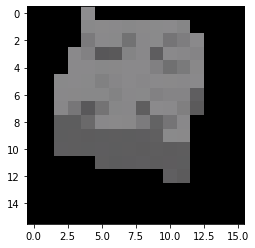

In [6]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from matplotlib import pyplot as plt


img = load_img("LEGO/valid/3003 Brick 2x2/0021.png",
               color_mode='rgb',
               target_size=(16,16)
              )


plt.imshow(img)

In [7]:
#Convert the image to array
single_image = img_to_array(img)

#Also divide the image values by 255 to normalize
img_rank4 = np.expand_dims(single_image/255, axis=0)

model.predict(img_rank4)

array([[0.0647119 , 0.06307745, 0.05365559, 0.06411253, 0.0642253 ,
        0.06070195, 0.06377913, 0.05888275, 0.05913322, 0.0661101 ,
        0.06805654, 0.06250016, 0.06302314, 0.06886139, 0.06059277,
        0.0585761 ]], dtype=float32)

In [8]:
np.round(model.predict(img_rank4),2)

array([[0.06, 0.06, 0.05, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.07, 0.07,
        0.06, 0.06, 0.07, 0.06, 0.06]], dtype=float32)

In [9]:
# We can predict the class directly using the following function:

np.argmax(model.predict(img_rank4), axis=-1)

array([13], dtype=int64)

In [10]:
# We can retrieve the class labels from the train_generator:

label_map = (train_data.class_indices)

label_map

{'11214 Bush 3M friction with Cross axle': 0,
 '18651 Cross Axle 2M with Snap friction': 1,
 '2357 Brick corner 1x2x2': 2,
 '3003 Brick 2x2': 3,
 '3004 Brick 1x2': 4,
 '3005 Brick 1x1': 5,
 '3022 Plate 2x2': 6,
 '3023 Plate 1x2': 7,
 '3024 Plate 1x1': 8,
 '3040 Roof Tile 1x2x45deg': 9,
 '3069 Flat Tile 1x2': 10,
 '32123 half Bush': 11,
 '3673 Peg 2M': 12,
 '3713 Bush for Cross Axle': 13,
 '3794 Plate 1X2 with 1 Knob': 14,
 '6632 Technic Lever 3M': 15}

In [11]:
# We can retrieve the class label of the prediction:

list(label_map.keys())[np.argmax(model.predict(img_rank4), axis=-1)[0]]

'3713 Bush for Cross Axle'